<a href="https://colab.research.google.com/github/KarthikAmuthrui/Mentor_tasks/blob/main/cars_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dataset using pandas
data = pd.read_csv('cars_class.csv')

In [3]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [4]:
data.shape

(719, 20)

In [5]:
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [6]:
data.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [8]:
data.describe()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


Observations:

1) Total 719 data points and 20 attributes.

2) All Attributes have same data type(int64).

3) There is no null values present in the data


#DataPreprocessing

In [9]:
#To know how many unique values in ID column
data['ID'].nunique()

719

Since all the values of ID column are unique we couldn't find any relation with other columns.

so we can drop this ID column.

In [10]:
#Dropping the ID column
data.drop('ID',axis =1, inplace = True)

In [11]:
#To know the distribution of each class. 
print(data[data['Class']==0]['Class'].value_counts())
print(data[data['Class']==1]['Class'].value_counts())
print(data[data['Class']==2]['Class'].value_counts())
print(data[data['Class']==3]['Class'].value_counts())

0    189
Name: Class, dtype: int64
1    180
Name: Class, dtype: int64
2    173
Name: Class, dtype: int64
3    177
Name: Class, dtype: int64


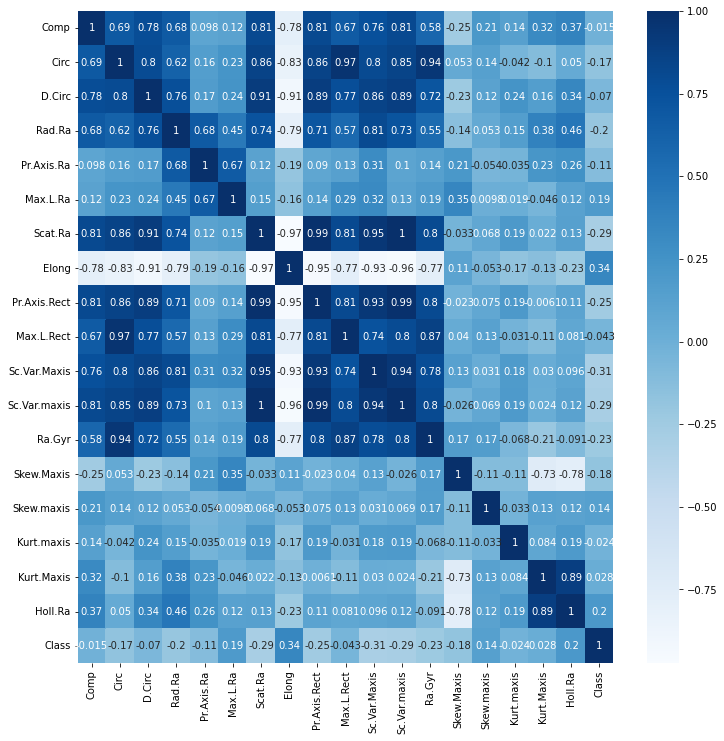

In [12]:
#Now find the correlation among the attributes
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')

From the avove correlation map we can say most the columns are highly correlated with each other either positively or negatively.

1.Circ is positively correlated with the columns(Scat.Ra, Pr.Axis.Rect,Max.L.Rect, Sc.Var.maxis, Ra.Gyr) and negatively correlated with Elong.

2.D.Circ is positively correlated with the columns(Scat.Ra, Pr.Axis.Rect,Sc.Var.Maxis, Sc.Var.maxis) and negatively correlated with Elong.

3.Scat.Ra is positively correlated with the columns(Circ, D.Circ, Pr.Axis.Rect, Sc.Var.Maxis, Sc.Var.maxis) and negatively correlated with Elong.

4.Holl.Ra is positively correlated with Kurt.Maxis

Let's us find the columns that are absolute correlated and drop them to reduce the complexity.

In [13]:
#Creating the correlation matrix
corr_matrix = data.corr().abs()
print(corr_matrix)

                  Comp      Circ    D.Circ    Rad.Ra  Pr.Axis.Ra  Max.L.Ra  \
Comp          1.000000  0.685515  0.782416  0.681598    0.098000  0.120446   
Circ          0.685515  1.000000  0.799001  0.621623    0.156770  0.234471   
D.Circ        0.782416  0.799001  1.000000  0.764652    0.168777  0.240817   
Rad.Ra        0.681598  0.621623  0.764652  1.000000    0.679403  0.447076   
Pr.Axis.Ra    0.098000  0.156770  0.168777  0.679403    1.000000  0.669598   
Max.L.Ra      0.120446  0.234471  0.240817  0.447076    0.669598  1.000000   
Scat.Ra       0.807686  0.860339  0.905598  0.736257    0.117125  0.146370   
Elong         0.784352  0.828911  0.910257  0.788814    0.193680  0.157702   
Pr.Axis.Rect  0.808425  0.857357  0.894926  0.708706    0.089976  0.142009   
Max.L.Rect    0.669999  0.965119  0.773701  0.565054    0.134261  0.291938   
Sc.Var.Maxis  0.756467  0.803929  0.858005  0.805961    0.305815  0.319976   
Sc.Var.maxis  0.813816  0.851841  0.887997  0.725038    0.104121

In [14]:
#setting the upper triangular matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper)

              Comp      Circ    D.Circ    Rad.Ra  Pr.Axis.Ra  Max.L.Ra  \
Comp           NaN  0.685515  0.782416  0.681598    0.098000  0.120446   
Circ           NaN       NaN  0.799001  0.621623    0.156770  0.234471   
D.Circ         NaN       NaN       NaN  0.764652    0.168777  0.240817   
Rad.Ra         NaN       NaN       NaN       NaN    0.679403  0.447076   
Pr.Axis.Ra     NaN       NaN       NaN       NaN         NaN  0.669598   
Max.L.Ra       NaN       NaN       NaN       NaN         NaN       NaN   
Scat.Ra        NaN       NaN       NaN       NaN         NaN       NaN   
Elong          NaN       NaN       NaN       NaN         NaN       NaN   
Pr.Axis.Rect   NaN       NaN       NaN       NaN         NaN       NaN   
Max.L.Rect     NaN       NaN       NaN       NaN         NaN       NaN   
Sc.Var.Maxis   NaN       NaN       NaN       NaN         NaN       NaN   
Sc.Var.maxis   NaN       NaN       NaN       NaN         NaN       NaN   
Ra.Gyr         NaN       NaN       NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [15]:
to_drop = [column for column in upper.columns if any(upper[column]> 0.90)]
print(to_drop)

['Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis', 'Ra.Gyr']


From the above observation the columns that are high correlated are 
['Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis', 'Ra.Gyr'].

we can drop these columns to reduce the complexity.

In [16]:
#Dropping the highly correlated columns
data = data.drop(to_drop, axis=1)

After dropping the columns get the shape of the data

In [17]:
data.shape

(719, 12)

In [18]:
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,88,39,70,166,66,7,69,5,13,193,201,0
1,85,35,64,129,57,6,65,1,23,196,203,3
2,91,41,84,141,57,9,72,9,14,189,199,3
3,102,54,98,177,56,10,72,5,17,186,196,1
4,87,39,74,152,58,6,70,1,33,187,196,2


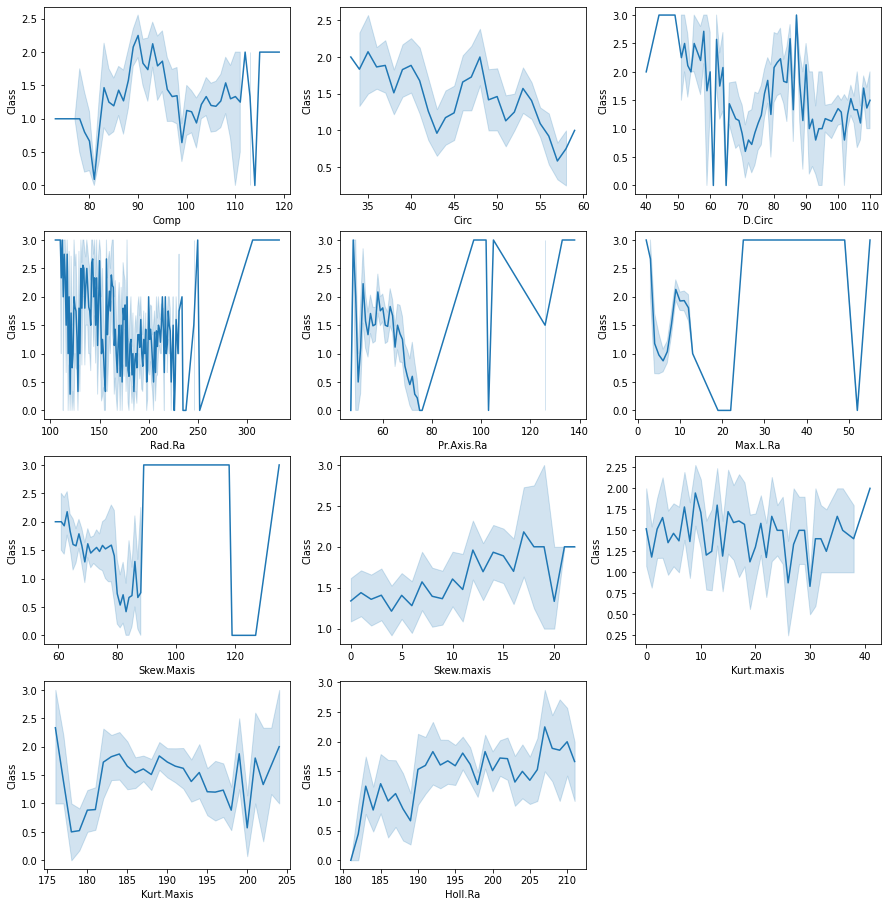

In [19]:
# line plot for all attributes
plt.figure(figsize = (15,20))
for i in enumerate (data.columns[:-1]):
    plt.subplot(5,3,i[0]+1)
    sns.lineplot(x = i[1],y = 'Class',data = data)

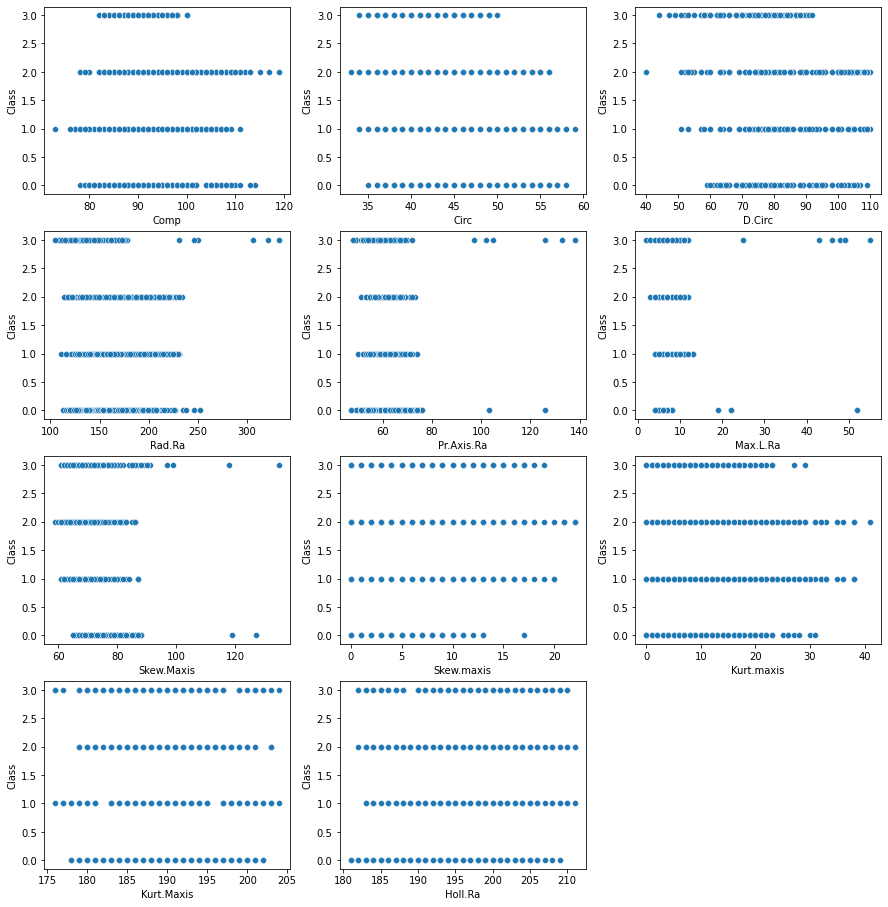

In [20]:
# scatter plot for all attributes
plt.figure(figsize = (15,20))
for i in enumerate (data.columns[:-1]):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'Class',data = data)

Splitting the data into X and y

In [21]:
X = data.iloc[:,:-1]
y = data['Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

**Data Standardization:**

Standardization data means bringing all attributes on same scale with mean = 0 and standard deviation = 1

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Building

Importing the classification models from sklearn library

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [25]:
#Creating the objects for each model

lr = LogisticRegression()
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [26]:
#importing the metrics

from sklearn.metrics import accuracy_score,f1_score,plot_confusion_matrix

**1) LogisticRegression**

In [27]:
lr.fit(X_train, y_train)
print('train accuracy : ',lr.score(X_train, y_train))
print('test accuracy : ',lr.score(X_test, y_test))

train accuracy :  0.76
test accuracy :  0.7569444444444444


In [28]:
y_pred = lr.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7569444444444444
f1-score =  [0.86111111 0.64788732 0.57142857 0.90243902]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


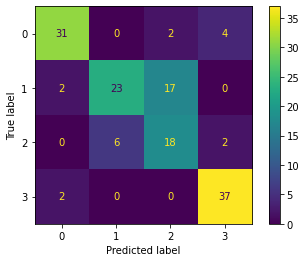

In [29]:
plot_confusion_matrix(lr,X_test,y_test)
plt.show()

**2) SVC**

In [30]:
svc.fit(X_train, y_train)
print('train accuracy : ',svc.score(X_train, y_train))
print('test accuracy : ',svc.score(X_test, y_test))

train accuracy :  0.8260869565217391
test accuracy :  0.7638888888888888


In [31]:
y_pred = svc.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7638888888888888
f1-score =  [0.93333333 0.61971831 0.5483871  0.9       ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


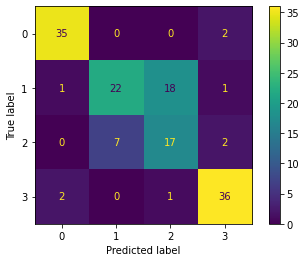

In [32]:
plot_confusion_matrix(svc,X_test,y_test)
plt.show()

**3) KNeighborsClassifier**

In [33]:
knc.fit(X_train, y_train)
print('train accuracy : ',knc.score(X_train, y_train))
print('test accuracy : ',knc.score(X_test, y_test))

train accuracy :  0.7808695652173913
test accuracy :  0.7152777777777778


In [34]:
y_pred = knc.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7152777777777778
f1-score =  [0.88607595 0.56       0.47457627 0.88      ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


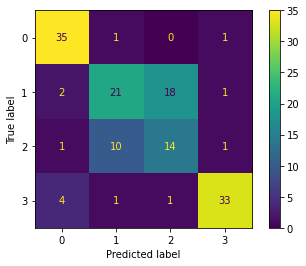

In [35]:
plot_confusion_matrix(knc,X_test,y_test)
plt.show()

**4)DecisionTreeClassifier**

In [36]:
dtc.fit(X_train, y_train)
print('train accuracy : ',dtc.score(X_train, y_train))
print('test accuracy : ',dtc.score(X_test, y_test))

train accuracy :  1.0
test accuracy :  0.6805555555555556


In [37]:
y_pred = dtc.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.6805555555555556
f1-score =  [0.87179487 0.49230769 0.46875    0.81481481]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


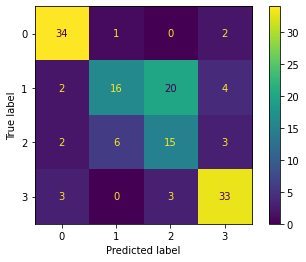

In [38]:
plot_confusion_matrix(dtc,X_test,y_test)
plt.show()

**5)RandomForestClassifier**

In [39]:
rfc.fit(X_train, y_train)
print('train accuracy : ',rfc.score(X_train, y_train))
print('test accuracy : ',rfc.score(X_test, y_test))

train accuracy :  1.0
test accuracy :  0.7569444444444444


In [40]:
y_pred = rfc.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7569444444444444
f1-score =  [0.93506494 0.63013699 0.45614035 0.91358025]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


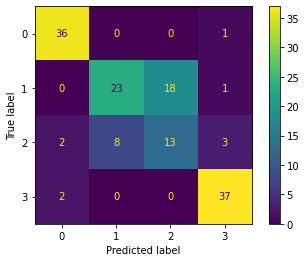

In [41]:
plot_confusion_matrix(rfc,X_test,y_test)
plt.show()

**6)GradientBoostingClassifier**

In [42]:
gbc.fit(X_train, y_train)
print('train accuracy : ',gbc.score(X_train, y_train))
print('test accuracy : ',gbc.score(X_test, y_test))

train accuracy :  0.991304347826087
test accuracy :  0.7708333333333334


In [43]:
y_pred = gbc.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7708333333333334
f1-score =  [0.93506494 0.64864865 0.49122807 0.925     ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


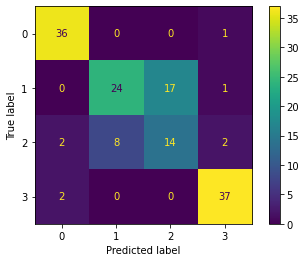

In [44]:
plot_confusion_matrix(gbc,X_test,y_test)
plt.show()

Observations:

From the above models SVC, RandomForestClassifier and     GradientBoostingClassifier perfroms well on the data. From that we get an accuracy of  0.763, 0.756,  0.770 respectively. and from confusion matrix we can say that these models classifies the data better than other models.


#Assesing the models

In [45]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

**1.RandomForestClassifier**

In [46]:
params_rfc = {'criterion':('gini','entropy'),'max_depth':(7,8,10),'min_samples_split':(3,4,5),'min_impurity_decrease':(0.001,0.01,0.1)}
rfc_gscv = GridSearchCV(rfc,param_grid = params_rfc)

In [47]:
rfc_gscv.fit(X_train,y_train)
print('train accuracy : ',rfc_gscv.score(X_train, y_train))
print('test accuracy : ',rfc_gscv.score(X_test, y_test))

train accuracy :  0.9947826086956522
test accuracy :  0.7638888888888888


In [48]:
y_pred = rfc_gscv.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7638888888888888
f1-score =  [0.92307692 0.63013699 0.49122807 0.925     ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


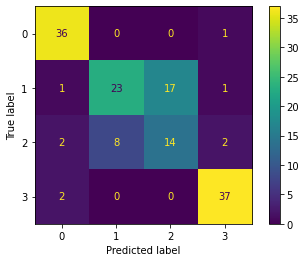

In [49]:
plot_confusion_matrix(rfc_gscv,X_test,y_test)
plt.show()

In [50]:
rfc_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_impurity_decrease': 0.001,
 'min_samples_split': 4}



---



**2.SVC**

In [51]:
params_svc = {'kernel':['poly', 'rbf','linear'],'C': [0.1, 1, 10, 100], 
              'gamma': ['auto','scale'],'degree':[3,4,5],'class_weight':['balanced']}

svc_gscv = GridSearchCV(svc,param_grid = params_svc)

In [52]:
svc_gscv.fit(X_train,y_train)
print('train accuracy : ',svc_gscv.score(X_train, y_train))
print('test accuracy : ',svc_gscv.score(X_test, y_test))

train accuracy :  0.9860869565217392
test accuracy :  0.8055555555555556


In [53]:
y_pred = svc_gscv.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.8055555555555556
f1-score =  [0.93333333 0.73809524 0.59259259 0.90666667]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


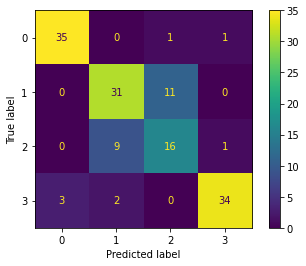

In [54]:
plot_confusion_matrix(svc_gscv,X_test,y_test)
plt.show()

In [55]:
svc_gscv.best_params_

{'C': 100,
 'class_weight': 'balanced',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf'}

**3.GradientBoostingClassifier**

In [56]:
params_gbc = {"n_estimators":[50,100,200],"max_depth":[1,3,5,7,9],"learning_rate":[0.01,0.1,1,10,100],'min_samples_split':[2,3,4,5]}
gbc_rscv = RandomizedSearchCV(gbc, param_distributions = params_gbc)

In [57]:
gbc_rscv.fit(X_train,y_train)
print('train accuracy : ',gbc_rscv.score(X_train, y_train))
print('test accuracy : ',gbc_rscv.score(X_test, y_test))

train accuracy :  1.0
test accuracy :  0.7777777777777778


In [58]:
y_pred = gbc_rscv.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.7777777777777778
f1-score =  [0.93506494 0.66666667 0.53571429 0.9       ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


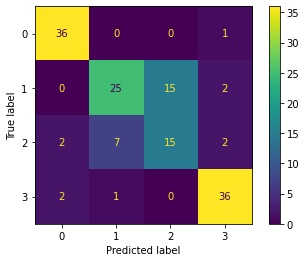

In [59]:
plot_confusion_matrix(gbc_rscv,X_test,y_test)
plt.show()

In [60]:
gbc_rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'max_depth': 5,
 'learning_rate': 0.1}

After Assesing the models we can observe that **SVC** gives the high accuracy i.e.,**0.805**. and also it classifies the data much better compare to other models.

#**Final_model** : SVC


Building the final_model SVC with its best parameters.

In [61]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(575, 11) (575,)
(144, 11) (144,)


In [62]:
parameters = {'C':[100],'class_weight':['balanced'], 'degree':[3] , 'gamma': ['scale'], 'kernel': ['rbf']}

final_model_svc = GridSearchCV(svc,param_grid = parameters)

In [63]:
final_model_svc.fit(X_train,y_train)
print('train accuracy : ',final_model_svc.score(X_train, y_train))
print('test accuracy : ',final_model_svc.score(X_test, y_test))

train accuracy :  0.9860869565217392
test accuracy :  0.8055555555555556


In [64]:
y_pred = final_model_svc.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred, y_test))
print('f1-score = ',f1_score(y_pred, y_test,average = None))

Accuracy =  0.8055555555555556
f1-score =  [0.93333333 0.73809524 0.59259259 0.90666667]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


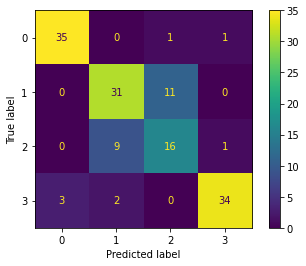

In [65]:
plot_confusion_matrix(final_model_svc,X_test,y_test)
plt.show()

**Conclusion:**

The accuracy of the final_model for the test data is 80% and the confusion matrix shows that it classifies all the data according to their classes with more than 60% accuracy.